# Using Convolutional Neural Networks

Welcome to the first week of the first deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to this week's task: 'Dogs vs Cats'

We're going to try to create a model to enter the [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats) competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): *"**State of the art**: The current literature suggests machine classifiers can score above 80% accuracy on this task"*. So if we can beat 80%, then we will be at the cutting edge as at 2013!

## Basic setup

There isn't too much to do to get started - just a few simple configuration steps.

This shows plots in the web page itself - we always wants to use this when using jupyter notebook:

In [2]:
%matplotlib inline

Define path to data: (It's a good idea to put it in a subdirectory of your notebooks folder, and then exclude that directory from git control by adding it to .gitignore.)

In [3]:
#path = "data/dogscats/"
path = "data/dogscats/sample/"

A few basic libraries that we'll need for the initial exercises:

In [4]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

We have created a file most imaginatively called 'utils.py' to store any little convenience functions we'll want to use. We will discuss these as we use them.

In [18]:
import utils; reload(utils)
from utils import plots

# Use a pretrained VGG model with our **Vgg16** class

Our first step is simply to use a model that has been fully created for us, which can recognise a wide variety (1,000 categories) of images. We will use 'VGG', which won the 2014 Imagenet competition, and is a very simple model to create and understand. The VGG Imagenet team created both a larger, slower, slightly more accurate model (*VGG  19*) and a smaller, faster model (*VGG 16*). We will be using VGG 16 since the much slower performance of VGG19 is generally not worth the very minor improvement in accuracy.

We have created a python class, *Vgg16*, which makes using the VGG 16 model very straightforward. 

## The punchline: state of the art custom model in 7 lines of code

Here's everything you need to do to get >97% accuracy on the Dogs vs Cats dataset - we won't analyze how it works behind the scenes yet, since at this stage we're just going to focus on the minimum necessary to actually do useful work.

In [37]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [38]:
# Import our class, and instantiate
from vgg16 import Vgg16

In [ ]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


The code above will work for any image recognition task, with any number of categories! All you have to do is to put your images into one folder per category, and run the code above.

Let's take a look at how this works, step by step...

## Use Vgg16 for basic image recognition

Let's start off by using the *Vgg16* class to recognise the main imagenet category for each image.

We won't be able to enter the Cats vs Dogs competition with an Imagenet model alone, since 'cat' and 'dog' are not categories in Imagenet - instead each individual breed is a separate category. However, we can use it to see how well it can recognise the images, which is a good first step.

First, create a Vgg16 object:

In [39]:
import numpy as np
vgg = Vgg16()

Vgg16 is built on top of *Keras* (which we will be learning much more about shortly!), a flexible, easy to use deep learning library that sits on top of Theano or Tensorflow. Keras reads groups of images and labels in *batches*, using a fixed directory structure, where images from each category for training must be placed in a separate folder.

Let's grab batches of data from our training folder:

In [40]:
path='/home/ubuntu/nbs/data/kaggle/dogscats/'
batches = vgg.get_batches(path+'test', batch_size=4)

Found 0 images belonging to 0 classes.


(BTW, when Keras refers to 'classes', it doesn't mean python classes - but rather it refers to the categories of the labels, such as 'pug', or 'tabby'.)

*Batches* is just a regular python iterator. Each iteration returns both the images themselves, as well as the labels.

In [66]:
imgs,labels = next(batches)


array([[[[  63.,   70.,   69., ...,    4.,    7.,   42.],
         [  65.,   69.,   68., ...,    6.,    7.,   42.],
         [  63.,   67.,   71., ...,   13.,    9.,   34.],
         ..., 
         [  29.,   35.,   37., ...,   24.,   28.,   28.],
         [  22.,   23.,   25., ...,   22.,   27.,   21.],
         [  21.,   16.,   18., ...,   24.,   31.,   21.]],

        [[  95.,  100.,   97., ...,   15.,   18.,   46.],
         [  97.,   99.,   96., ...,   17.,   18.,   46.],
         [  96.,   98.,   99., ...,   23.,   20.,   38.],
         ..., 
         [  30.,   36.,   38., ...,   24.,   28.,   28.],
         [  23.,   24.,   26., ...,   22.,   27.,   21.],
         [  22.,   17.,   19., ...,   24.,   31.,   21.]],

        [[ 120.,  124.,  118., ...,   17.,   20.,   45.],
         [ 122.,  123.,  117., ...,   19.,   20.,   45.],
         [ 113.,  118.,  121., ...,   24.,   22.,   37.],
         ..., 
         [  32.,   38.,   40., ...,   26.,   30.,   28.],
         [  25.,   26.,

As you can see, the labels for each image are an array, containing a 1 in the first position if it's a cat, and in the second position if it's a dog. This approach to encoding categorical variables, where an array containing just a single 1 in the position corresponding to the category, is very common in deep learning. It is called *one hot encoding*. 

The arrays contain two elements, because we have two categories (cat, and dog). If we had three categories (e.g. cats, dogs, and kangaroos), then the arrays would each contain two 0's, and one 1.

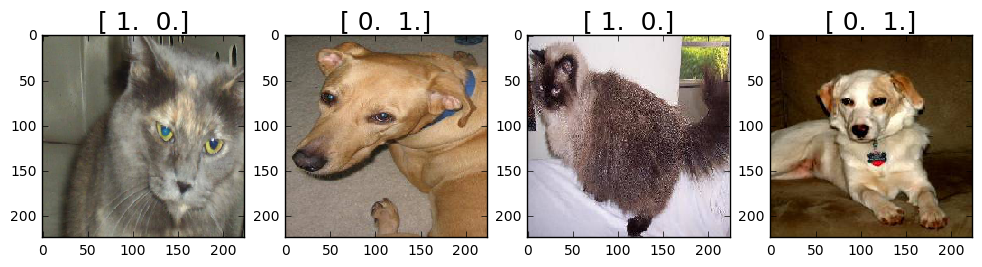

In [59]:
plots(imgs, titles=labels)

We can now pass the images to Vgg16's predict() function to get back probabilities, category indexes, and category names for each image's VGG prediction.

In [75]:
out = vgg.predict(imgs, True)
out[1][0]


(array([ 0.1687,  0.5824,  0.6799,  0.1582], dtype=float32),
 array([285, 281, 223, 876]),
 [u'Egyptian_cat', u'tabby', u'schipperke', u'tub'])

The category indexes are based on the ordering of categories used in the VGG model - e.g here are the first four:

In [36]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

(Note that, other than creating the Vgg16 object, none of these steps are necessary to build a model; they are just showing how to use the class to view imagenet predictions.)

## Use our Vgg16 class to finetune a Dogs vs Cats model

To change our model so that it outputs "cat" vs "dog", instead of one of 1,000 very specific categories, we need to use a process called "finetuning". Finetuning looks from the outside to be identical to normal machine learning training - we provide a training set with data and labels to learn from, and a validation set to test against. The model learns a set of parameters based on the data provided.

However, the difference is that we start with a model that is already trained to solve a similar problem. The idea is that many of the parameters should be very similar, or the same, between the existing model, and the model we wish to create. Therefore, we only select a subset of parameters to train, and leave the rest untouched. This happens automatically when we call *fit()* after calling *finetune()*.

We create our batches just like before, and making the validation set available as well. A 'batch' (or *mini-batch* as it is commonly known) is simply a subset of the training data - we use a subset at a time when training or predicting, in order to speed up training, and to avoid running out of memory.

In [37]:
batch_size=64

In [38]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 25000 images belonging to 2 classes.


OSError: [Errno 2] No such file or directory: '/home/ubuntu/nbs/data/kaggle/dogscats/mine/valid'

Calling *finetune()* modifies the model such that it will be trained based on the data in the batches provided - in this case, to predict either 'dog' or 'cat'.

In [39]:
vgg.finetune(batches)

Finally, we *fit()* the parameters of the model using the training data, reporting the accuracy on the validation set after every epoch. (An *epoch* is one full pass through the training data.)

In [17]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
160/160 [==============================] - 6s - loss: 4.9065 - acc: 0.5125 - val_loss: 5.7910 - val_acc: 0.6000


That shows all of the steps involved in using the Vgg16 class to create an image recognition model using whatever labels you are interested in. For instance, this process could classify paintings by style, or leaves by type of disease, or satellite photos by type of crop, and so forth.

Next up, we'll dig one level deeper to see what's going on in the Vgg16 class.

# Create a VGG model from scratch in Keras

For the rest of this tutorial, we will not be using the Vgg16 class at all. Instead, we will recreate from scratch the functionality we just used. This is not necessary if all you want to do is use the existing model - but if you want to create your own models, you'll need to understand these details. It will also help you in the future when you debug any problems with your models, since you'll understand what's going on behind the scenes.

## Model setup

We need to import all the modules we'll be using from numpy, scipy, and keras:

In [2]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


Let's import the mappings from VGG ids to imagenet category ids and descriptions, for display purposes later.

In [5]:
FILES_PATH = 'http://www.platform.ai/models/'; CLASS_FILE='imagenet_class_index.json'
# Keras' get_file() is a handy function that downloads files, and caches them for re-use later
fpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
with open(fpath) as f: class_dict = json.load(f)
# Convert dictionary with string indexes into an array
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

Here's a few examples of the categories we just imported:

In [6]:
classes[:5]


[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']

## Model creation

Creating the model involves creating the model architecture, and then loading the model weights into that architecture. We will start by defining the basic pieces of the VGG architecture.

VGG has just one type of convolutional block, and one type of fully connected ('dense') block. Here's the convolutional block definition:

In [7]:
def ConvBlock(layers, model, filters):
    for i in range(layers): 
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

...and here's the fully-connected definition.

In [8]:
def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

When the VGG model was trained in 2014, the creators subtracted the average of each of the three (R,G,B) channels first, so that the data for each channel had a mean of zero. Furthermore, their software that expected the channels to be in B,G,R order, whereas Python by default uses R,G,B. We need to preprocess our data to make these two changes, so that it is compatible with the VGG model:

In [9]:
# Mean of each channel as provided by VGG researchers
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

def vgg_preprocess(x):
    x = x - vgg_mean     # subtract mean
    return x[:, ::-1]    # reverse axis bgr->rgb

Now we're ready to define the VGG model architecture - look at how simple it is, now that we have the basic blocks defined!

In [10]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))

    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000, activation='softmax'))
    return model

We'll learn about what these different blocks do later in the course. For now, it's enough to know that:

- Convolution layers are for finding patterns in images
- Dense (fully connected) layers are for combining patterns across an image

Now that we've defined the architecture, we can create the model like any python object:

In [11]:
model = VGG_16()

As well as the architecture, we need the weights that the VGG creators trained. The weights are the part of the model that is learnt from the data, whereas the architecture is pre-defined based on the nature of the problem. 

Downloading pre-trained weights is much preferred to training the model ourselves, since otherwise we would have to download the entire Imagenet archive, and train the model for many days! It's very helpful when researchers release their weights, as they did here.

In [12]:
fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
model.load_weights(fpath)

## Getting imagenet predictions

The setup of the imagenet model is now complete, so all we have to do is grab a batch of images and call *predict()* on them.

In [13]:
batch_size = 4

Keras provides functionality to create batches of data from directories containing images; all we have to do is to define the size to resize the images to, what type of labels to create, whether to randomly shuffle the images, and how many images to include in each batch. We use this little wrapper to define some helpful defaults appropriate for imagenet data:

In [66]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=False, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

From here we can use exactly the same steps as before to look at predictions from the model.

In [77]:
path='/home/ubuntu/nbs/data/kaggle/dogscats/mine/'
batches = vgg.get_batches(path + 'train', batch_size=batch_size*2)
val_batches = get_batches('valid', batch_size=batch_size)
imgs,labels = next(batches)

# This shows the 'ground truth'
plots(imgs, titles=labels)

Found 17778 images belonging to 2 classes.
Found 7222 images belonging to 2 classes.


The VGG model returns 1,000 probabilities for each image, representing the probability that the model assigns to each possible imagenet category for each image. By finding the index with the largest probability (with *np.argmax()*) we can find the predicted label.

In [47]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    preds
    idxs = np.argmax(preds, axis=1)

    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

SyntaxError: invalid syntax (<ipython-input-47-e41afe38ef8a>, line 3)

In [69]:
path='/home/ubuntu/nbs/data/kaggle/dogscats/'
batches = get_batches('test', batch_size=batch_size*4)
imgs,labels = next(batches)
print("Test shape: {}".format(imgs.shape))
preds = model.predict(imgs)

  

Found 12500 images belonging to 1 classes.
Test shape: (256, 3, 224, 224)


In [74]:
print('Shape: {}'.format(preds.shape))
idxs = np.argmax(preds, axis=1)
print('idxs: {}'.format(idxs))


Shape: (256, 1000)
idxs: [285 353 281 285 246 229 285   5 281 285 285 236 281 285 235 285 232 216 222 209 172 250 179 588 171
 168 205 281 224 281 285 162 281 270 236 285 250 226 176 285 170 284 285 534 179 287 281 182 162 256
 246 281 700 193 281 215 248 281 168 851 154 207 285 904 162 165 281 281 285 281 234 281 281 205 208
 285 202 232 166 247 184 489 285 921 176 283 248 283 256 285 266 266 332 508 237 281 161 285 159 151
 270 361 164 284 209 860 281 281 223 162 180 285 974 281 290 237 283 182 265 179 153 170 473 205 284
 284 284 282 159 285 158 281 287 205 223 230 180 537 281 283 700 281 283 165 236 239 227 284 239 235
 357 284 281 281 285 281 285 223 174 224 247 281 281 228 207 285 282 176 227 287 173 700 242 285 161
 191 246 285 223 180 281 251 264 179 281 204 211 281 270 284 285 284 197 163 285 227 285 264 285 258
 285 207 361 246 285 283 210 257 263 217 285 159 281 374 208 284 401 160 179 238 155 158 223 180 478
 285 282 281 255 166 463 281 157 157 159 208 250 166 217 210 223 8

In [75]:
 
print('Shape: {}'.format(preds.shape))
print('First 5 classes: {}'.format(classes[:5]))
print('First 5 probabilities: {}\n'.format(preds[0, :5]))
print('Predictions prob/class: ')
    
for i in range(len(idxs)):
    idx = idxs[i]
    print ('{}  {:.4f}'.format(i,preds[i, idx]))
    

Shape: (256, 1000)
First 5 classes: [u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']
First 5 probabilities: [  4.9828e-07   7.5661e-08   1.9479e-06   5.6609e-08   5.5018e-07]

Predictions prob/class: 
0  0.8264
1  0.3360
2  0.6299
3  0.2321
4  0.5742
5  0.2567
6  0.5104
7  0.1691
8  0.6428
9  0.8628
10  0.3828
11  0.7873
12  0.5682
13  0.1987
14  0.7979
15  0.2029
16  0.5133
17  0.5594
18  0.3480
19  0.1315
20  0.3733
21  0.3321
22  0.1640
23  0.0918
24  0.4117
25  0.5879
26  0.5792
27  0.4195
28  0.9838
29  0.4526
30  0.4501
31  0.8113
32  0.1115
33  0.3903
34  0.4451
35  0.8605
36  0.1154
37  0.3552
38  0.7837
39  0.1914
40  0.3906
41  0.2206
42  0.3211
43  0.3313
44  0.4393
45  0.3865
46  0.4589
47  0.4484
48  0.9739
49  0.5419
50  0.1567
51  0.4369
52  0.1029
53  0.6337
54  0.5353
55  0.4528
56  0.1377
57  0.3305
58  0.9420
59  0.4984
60  0.9960
61  0.6311
62  0.7086
63  0.0737
64  0.2435
65  0.3911
66  0.5653
67  0.3503
68  0.7105
69  0.2838
70  0.8041


In [46]:
pred_batch(imgs)

Shape: (256, 1000)
First 5 classes: [u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']
First 5 probabilities: [  1.6656e-05   1.4793e-06   2.4533e-07   2.2585e-07   4.3907e-07]

Predictions prob/class: 
  0.3765/miniature_pinscher
  0.5609/miniature_poodle
  0.1505/boxer
  0.4168/Old_English_sheepdog
  0.7720/German_shepherd
  0.9013/Egyptian_cat
  0.6912/Egyptian_cat
  0.3420/tiger_cat
  0.3992/carton
  0.4119/tabby
  0.1944/spider_monkey
  0.1926/boxer
  0.4804/bookcase
  0.1042/Scotch_terrier
  0.5560/tabby
  0.6263/tabby
  0.4515/Chihuahua
  0.7954/Irish_setter
  0.2799/Cardigan
  0.4564/Eskimo_dog
  0.2638/Pembroke
  0.5181/Egyptian_cat
  0.1209/kelpie
  0.3162/tabby
  0.4590/Egyptian_cat
  0.2078/grey_fox
  0.3584/French_bulldog
  0.1759/hamster
  0.3536/tabby
  0.3345/Australian_terrier
  0.3119/basenji
  0.3247/tiger_cat
  0.1128/beagle
  0.6901/kelpie
  0.4335/hamster
  0.3459/paper_towel
  0.3550/golden_retriever
  0.6972/Shetland_sheepdog
  0.1774/b

In [26]:
import os, cv2, random
TEST_DIR = '/home/ubuntu/nbs/data/kaggle/dogscats/test'
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]
test_images =  test_images[:25]
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC)
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, 3, 64, 64), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

test = prep_data(test_images)
print("Test shape: {}".format(test.shape))



ImportError: No module named cv2